In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = '/mnt/labserver/HURTAK_Femke/Experimental_data/Optogenetics/Optobot/G7/GtACR2/231129_red_led/113230_s2a10_p6-0/'
centroid_file_name = 'G7_GtACR2_p6-0_80fps_tracked.pkl'
centroid_file_path = os.path.join(data_path, centroid_file_name)
stimulation_file_name = 'experiment_dict.npy'
stimulation_file_path = os.path.join(data_path, stimulation_file_name)


In [3]:
stim_data = np.load(stimulation_file_path, allow_pickle=True).item()
#stim_data['fly0']['on0']

In [4]:
data = pd.read_pickle(centroid_file_path)

In [5]:
# add a column 'stimulation' to the data frame, where the value is 1 if the
# stimulus was on and 0 if the stimulus was off.
data['stimulation'] = 0
for stim in stim_data['stimulation_paradigm']: # list on 'off0', 'on0', 'off1', 'on1', ...
    if 'on' in stim:
        start_frame = stim_data['fly0'][stim]['startFrame']
        end_frame = stim_data['fly0'][stim]['stopFrame']
        data.loc[start_frame:end_frame, 'stimulation'] = 1
data


id              0             stimulation
            pos_x       pos_y            
frame                                    
0      424.175974  188.435181           0
1      424.173554  188.663805           0
2      424.181068  188.701257           0
3      424.156335  188.633845           0
4      424.148170  188.674887           0
...           ...         ...         ...
14395  144.004347  485.297512           1
14396  144.039725  485.284349           1
14397  144.054755  485.346835           1
14398  144.054755  485.346835           1
14399  144.066032  485.383802           1

[14400 rows x 3 columns]

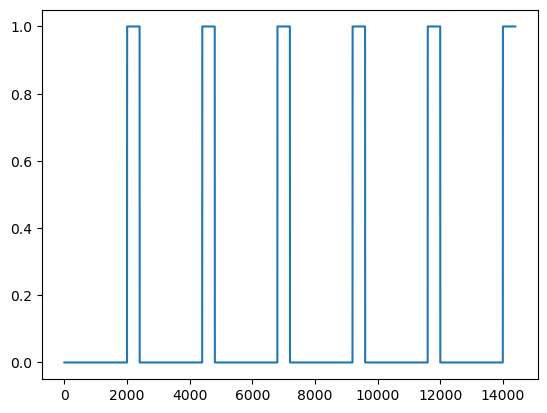

In [6]:
plt.plot(data['stimulation'])

In [7]:
#data
# get data indexed by the second level of the columns without swapping
#data.loc[:, (slice(None), 'pos_x')]
data.columns

MultiIndex([(            0, 'pos_x'),
            (            0, 'pos_y'),
            ('stimulation',      '')],
           names=['id', None])

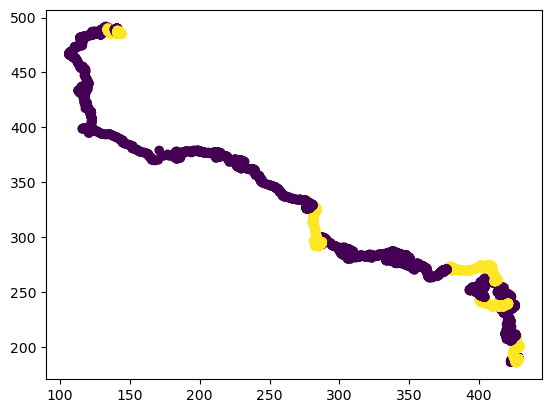

In [8]:
plt.scatter(
    data.loc[:, (slice(None), 'pos_x')],
    data.loc[:, (slice(None), 'pos_y')],
    c=data['stimulation'])

In [9]:
dlc_path = os.path.join(data_path, 'resultsDLC','vid_p6-0_on0_fly0DLC_resnet50_dlcTrackingAug6shuffle1_1030000.h5')
dlc_data = pd.read_hdf(dlc_path)
dlc_data

scorer    DLC_resnet50_dlcTrackingAug6shuffle1_1030000                        \
bodyparts                                   RFbodyCoxa                         
coords                                               x          y likelihood   
0                                            73.793900  48.286373        1.0   
1                                            73.772171  48.279736        1.0   
2                                            73.776733  48.249718        1.0   
3                                            73.750893  48.241753        1.0   
4                                            73.792549  48.276855        1.0   
..                                                 ...        ...        ...   
395                                          71.168510  49.432785        1.0   
396                                          73.812859  40.814796        1.0   
397                                          74.204765  42.395096        1.0   
398                                          73.041512  47.632053        1.0   
399                                          71.430443  48.805443        1.0   

scorer                                                                 \
bodyparts RFfemurTibia                       RFtibiaTarsus              
coords               x          y likelihood             x          y   
0            82.455078  45.885395        1.0     80.155914  37.486782   
1            82.462509  45.838890        1.0     80.145164  37.517139   
2            82.474823  45.844940        1.0     80.028366  37.477158   
3            82.464584  45.762196        1.0     80.081497  37.406250   
4            82.498566  45.822403        1.0     80.120270  37.479893   
..                 ...        ...        ...           ...        ...   
395          79.184631  43.786434        1.0     78.527084  36.588230   
396          83.145332  38.666374        1.0     77.990433  30.180513   
397          84.379623  41.225544        1.0     78.525459  31.116138   
398          84.112877  42.905884        1.0     78.827522  33.772873   
399          79.456604  43.243237        1.0     78.554718  35.667114   

scorer                           ...                                    \
bodyparts                RFclaw  ...      Rwing      Lwing               
coords    likelihood          x  ... likelihood          x           y   
0                1.0  84.543915  ...        1.0  67.993690  115.647568   
1                1.0  84.484818  ...        1.0  67.934341  115.630852   
2                1.0  84.227005  ...        1.0  67.992424  115.595856   
3                1.0  84.293930  ...        1.0  67.908424  115.652573   
4                1.0  84.391724  ...        1.0  67.865974  115.680290   
..               ...        ...  ...        ...        ...         ...   
395              1.0  81.218109  ...        1.0  68.881790  114.805122   
396              1.0  80.272591  ...        1.0  66.071175  110.367905   
397              1.0  80.694786  ...        1.0  70.010536  111.866302   
398              1.0  82.645790  ...        1.0  67.696365  111.485207   
399              1.0  81.579124  ...        1.0  70.470512  115.307045   

scorer                                                                       \
bodyparts                Thorax                          Abdomen              
coords    likelihood          x          y likelihood          x          y   
0                1.0  70.487885  61.393822        1.0  71.060890  95.025955   
1                1.0  70.470589  61.320930        1.0  71.149857  95.053474   
2                1.0  70.439003  61.203716        1.0  71.084824  94.957870   
3                1.0  70.517075  61.297504        1.0  71.161804  95.077812   
4                1.0  70.584106  61.368488        1.0  71.204597  95.101326   
..               ...        ...        ...        ...        ...        ...   
395              1.0  70.173531  61.710567        1.0  71.869843  95.029190   
396              1.0  70.4807

In [10]:
dlc_data.columns.levels[1]

Index(['Abdomen', 'LFbodyCoxa', 'LFclaw', 'LFfemurTibia', 'LFtibiaTarsus',
       'LHbodyCoxa', 'LHclaw', 'LHfemurTibia', 'LHtibiaTarsus', 'LMbodyCoxa',
       'LMclaw', 'LMfemurTibia', 'LMtibiaTarsus', 'Lantenna', 'Leye', 'Lwing',
       'RFbodyCoxa', 'RFclaw', 'RFfemurTibia', 'RFtibiaTarsus', 'RHbodyCoxa',
       'RHclaw', 'RHfemurTibia', 'RHtibiaTarsus', 'RMbodyCoxa', 'RMclaw',
       'RMfemurTibia', 'RMtibiaTarsus', 'Rantenna', 'Reye', 'Rwing', 'Thorax'],
      dtype='object', name='bodyparts')

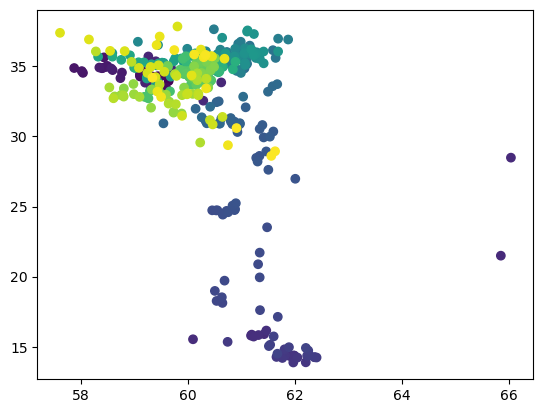

In [11]:
plt.scatter(
    dlc_data.loc[:, (slice(None), 'LFclaw', 'x')],
    dlc_data.loc[:, (slice(None), 'LFclaw', 'y')],
    c=dlc_data.index)

In [38]:
def tracking_motion_energy(data):
    # calculate the motion energy of the legs
    # data is a pandas dataframe with the columns containing the x and y
    # coordinates of the legs
    # returns a pandas dataframe with the motion energy of each leg
    # the motion energy is calculated as the sum of the squared differences
    # between the coordinates of the leg in the current frame and the
    # coordinates of the leg in the previous frame
    for point in data.columns.levels[1]:
        dx = data.loc[:, (slice(None), point, 'x')].diff()
        dy = data.loc[:, (slice(None), point, 'y')].diff()
        dx = dx.fillna(0)
        dy = dy.fillna(0)
        # create a new column
        data[(slice(None), point, 'dx')] = dx 

    return data
    

In [39]:
dlc_data = tracking_motion_energy(dlc_data)
dlc_data

#data.loc[:, (slice(None), point, 'me')] = np.sqrt(np.square(dx).values + np.square(dy).values)


InvalidIndexError: slice(None, None, None)

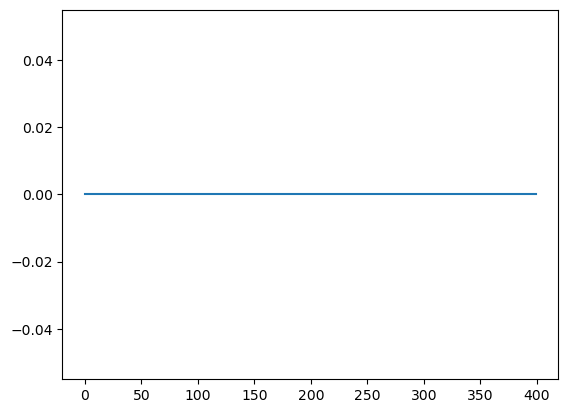

In [15]:
plt.plot(ME['LFclaw'])